In [134]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2

In [135]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [136]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [137]:
cat=['Normal','vitiligo']

In [138]:
import pandas as pd
import os
def data_dictionary():
    path_train=r"C:\Users\teknoloji5\Downloads\skin\skin\train/"
    #list_train=os.listdir(path_train)
    cat=['Normal','vitiligo']
   #cat=['Normal','Melanoma Skin Cancer Nevi and Moles']
    #cat=['Normal','Eczema Photos']
    #cat=['Normal','Tinea Ringworm Candidiasis and other Fungal Infections']
    #cat=['Normal','Acne and Rosacea Photos']
    train_dictionary={"image_path":[],"target":[]}
    k=0
    for i in cat:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)     
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [139]:
train=data_dictionary()

In [140]:
import cv2
images=[]
label=[]
for i in train['image_path']:

    img=cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(100,100))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
    #img=resize_and_rescale(img)
    images.append(img)

In [141]:
label=train['target']

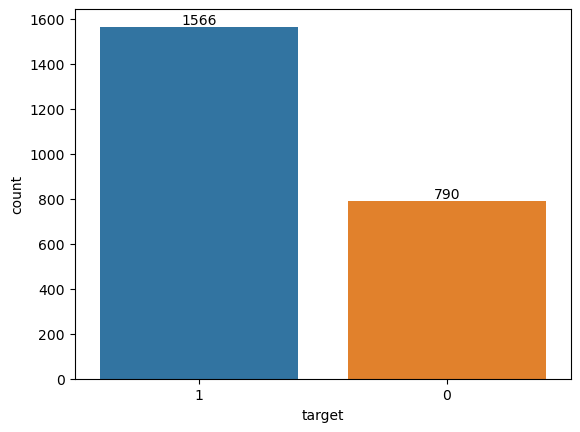

In [142]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)

ax = sns.countplot(x=train['target'],
                   order=train['target'].value_counts(ascending=False).index);

abs_values = train['target'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [143]:
len(label)

2356

In [144]:
len(images)

2356

In [145]:
import numpy as np
import pandas as pd

In [146]:
data=np.array(images)

In [147]:
label=np.array(label)

In [148]:
data.shape

(2356, 100, 100, 3)

In [149]:
label.shape

(2356,)

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=4)
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=1)

In [151]:
X_train.shape

(1884, 100, 100, 3)

In [152]:
X_test.shape

(472, 100, 100, 3)

In [153]:
y_test.shape

(472,)

In [154]:
import keras
num_classes = 2
#num_classes = 2 
#اذا تريد ان تشغل الثنائي فعل الكود "#num_classes = 2 " اما 

y_train = keras.utils.to_categorical(y_train, num_classes)

In [155]:
y_test=keras.utils.to_categorical(y_test, num_classes)

In [156]:
y_test.shape

(472, 2)

In [157]:
y_train.shape

(1884, 2)

In [158]:
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [159]:
#base_model = ResNet50(weights=None, include_top=True ,classes=6, input_shape=(100, 100, 3))
#base_model = EfficientNetB0(weights=None, include_top=True ,classes=2, input_shape=(100, 100, 3))
#base_model = VGG16(weights=None, include_top=True ,classes=2, input_shape=(100, 100, 3))
#base_model = InceptionV3(weights=None, include_top=True ,classes=2, input_shape=(100, 100, 3))
base_model = EfficientNetB3(weights=None, include_top=True ,classes=2, input_shape=(100, 100, 3))
#base_model = VGG19(weights=None, include_top=True ,classes=2, input_shape=(100, 100, 3))
# Add a global average pooling layer to reduce the spatial dimensions of the features
'''

x = GlobalAveragePooling2D()(x)
# Add a fully connected layer with 256 units and ReLU activation
x = Dense(256, activation='relu')(x)
x = base_model.output

# Add the final classification layer with the number of classes in your dataset
predictions = Dense(2, activation='softmax')(x)
# Create the model with the base VGG19 model as input and the new classification layers on top
model = Model(inputs=base_model.input, outputs=predictions)


'''


"\n\nx = GlobalAveragePooling2D()(x)\n# Add a fully connected layer with 256 units and ReLU activation\nx = Dense(256, activation='relu')(x)\nx = base_model.output\n\n# Add the final classification layer with the number of classes in your dataset\npredictions = Dense(2, activation='softmax')(x)\n# Create the model with the base VGG19 model as input and the new classification layers on top\nmodel = Model(inputs=base_model.input, outputs=predictions)\n\n\n"

In [160]:
base_model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 100, 100, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 100, 100, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 101, 101, 3)          0         ['normalization[0

 D)                                                                                               
                                                                                                  
 block2a_expand_bn (BatchNo  (None, 50, 50, 144)          576       ['block2a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2a_expand_activation   (None, 50, 50, 144)          0         ['block2a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2a_dwconv_pad (ZeroPa  (None, 51, 51, 144)          0         ['block2a_expand_activation[0]
 dding2D)                                                           [0]']                         
          

                                                                                                  
 block2c_expand_bn (BatchNo  (None, 25, 25, 192)          768       ['block2c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2c_expand_activation   (None, 25, 25, 192)          0         ['block2c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2c_dwconv (DepthwiseC  (None, 25, 25, 192)          1728      ['block2c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block2c_b

 block3b_expand_bn (BatchNo  (None, 13, 13, 288)          1152      ['block3b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block3b_expand_activation   (None, 13, 13, 288)          0         ['block3b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block3b_dwconv (DepthwiseC  (None, 13, 13, 288)          7200      ['block3b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block3b_bn (BatchNormaliza  (None, 13, 13, 288)          1152      ['block3b_dwconv[0][0]']      
 tion)    

                                                                                                  
 block4a_expand_bn (BatchNo  (None, 13, 13, 288)          1152      ['block4a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4a_expand_activation   (None, 13, 13, 288)          0         ['block4a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4a_dwconv_pad (ZeroPa  (None, 15, 15, 288)          0         ['block4a_expand_activation[0]
 dding2D)                                                           [0]']                         
                                                                                                  
 block4a_d

 block4c_expand_bn (BatchNo  (None, 7, 7, 576)            2304      ['block4c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4c_expand_activation   (None, 7, 7, 576)            0         ['block4c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4c_dwconv (DepthwiseC  (None, 7, 7, 576)            5184      ['block4c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block4c_bn (BatchNormaliza  (None, 7, 7, 576)            2304      ['block4c_dwconv[0][0]']      
 tion)    

                                                                                                  
 block4e_expand_bn (BatchNo  (None, 7, 7, 576)            2304      ['block4e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4e_expand_activation   (None, 7, 7, 576)            0         ['block4e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4e_dwconv (DepthwiseC  (None, 7, 7, 576)            5184      ['block4e_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block4e_b

 block5b_expand_activation   (None, 7, 7, 816)            0         ['block5b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5b_dwconv (DepthwiseC  (None, 7, 7, 816)            20400     ['block5b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5b_bn (BatchNormaliza  (None, 7, 7, 816)            3264      ['block5b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5b_activation (Activa  (None, 7, 7, 816)            0         ['block5b_bn[0][0]']          
 tion)    

                                                                                                  
 block5d_expand_activation   (None, 7, 7, 816)            0         ['block5d_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5d_dwconv (DepthwiseC  (None, 7, 7, 816)            20400     ['block5d_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5d_bn (BatchNormaliza  (None, 7, 7, 816)            3264      ['block5d_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5d_a

 rmalization)                                                                                     
                                                                                                  
 block6a_expand_activation   (None, 7, 7, 816)            0         ['block6a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6a_dwconv_pad (ZeroPa  (None, 11, 11, 816)          0         ['block6a_expand_activation[0]
 dding2D)                                                           [0]']                         
                                                                                                  
 block6a_dwconv (DepthwiseC  (None, 4, 4, 816)            20400     ['block6a_dwconv_pad[0][0]']  
 onv2D)                                                                                           
          

                                                                                                  
 block6c_expand_activation   (None, 4, 4, 1392)           0         ['block6c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6c_dwconv (DepthwiseC  (None, 4, 4, 1392)           34800     ['block6c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6c_bn (BatchNormaliza  (None, 4, 4, 1392)           5568      ['block6c_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6c_a

 rmalization)                                                                                     
                                                                                                  
 block6e_expand_activation   (None, 4, 4, 1392)           0         ['block6e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6e_dwconv (DepthwiseC  (None, 4, 4, 1392)           34800     ['block6e_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6e_bn (BatchNormaliza  (None, 4, 4, 1392)           5568      ['block6e_dwconv[0][0]']      
 tion)                                                                                            
          

 block7a_expand_bn (BatchNo  (None, 4, 4, 1392)           5568      ['block7a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block7a_expand_activation   (None, 4, 4, 1392)           0         ['block7a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block7a_dwconv (DepthwiseC  (None, 4, 4, 1392)           12528     ['block7a_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block7a_bn (BatchNormaliza  (None, 4, 4, 1392)           5568      ['block7a_dwconv[0][0]']      
 tion)    

                                                                                                  
 avg_pool (GlobalAveragePoo  (None, 1536)                 0         ['top_activation[0][0]']      
 ling2D)                                                                                          
                                                                                                  
 top_dropout (Dropout)       (None, 1536)                 0         ['avg_pool[0][0]']            
                                                                                                  
 predictions (Dense)         (None, 2)                    3074      ['top_dropout[0][0]']         
                                                                                                  
Total params: 10786609 (41.15 MB)
Trainable params: 10699306 (40.81 MB)
Non-trainable params: 87303 (341.03 KB)
________________________________________________________________________________________________

In [161]:
# model = Sequential()
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(220,220,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(6, activation='sigmoid'))

In [162]:

# Compile the model
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [163]:
history=base_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,verbose=1) 

Epoch 1/10
59/59 [==============================] - 201s 3s/step - loss: 3.4281 - accuracy: 0.5754 - val_loss: 1.0178 - val_accuracy: 0.6610
Epoch 2/10
59/59 [==============================] - 166s 3s/step - loss: 1.6160 - accuracy: 0.7075 - val_loss: 0.9232 - val_accuracy: 0.3390
Epoch 3/10
59/59 [==============================] - 165s 3s/step - loss: 1.1100 - accuracy: 0.7288 - val_loss: 0.8297 - val_accuracy: 0.6610
Epoch 4/10
59/59 [==============================] - 166s 3s/step - loss: 1.0465 - accuracy: 0.7351 - val_loss: 0.6881 - val_accuracy: 0.6419
Epoch 5/10
59/59 [==============================] - 164s 3s/step - loss: 1.0374 - accuracy: 0.7739 - val_loss: 0.7689 - val_accuracy: 0.2797
Epoch 6/10
59/59 [==============================] - 166s 3s/step - loss: 0.7171 - accuracy: 0.7914 - val_loss: 0.7216 - val_accuracy: 0.6610
Epoch 7/10
59/59 [==============================] - 169s 3s/step - loss: 0.7336 - accuracy: 0.7956 - val_loss: 0.6069 - val_accuracy: 0.6674
Epoch 8/10
59

In [164]:
_, acc = base_model.evaluate(X_test, y_test)

15/15 [==============================] - 8s 535ms/step - loss: 0.4189 - accuracy: 0.8453


In [165]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [166]:
y_pred=base_model.predict(X_test)

15/15 [==============================] - 10s 522ms/step


In [167]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [168]:
y_test=np.argmax(y_test, axis=1)

In [169]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [170]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

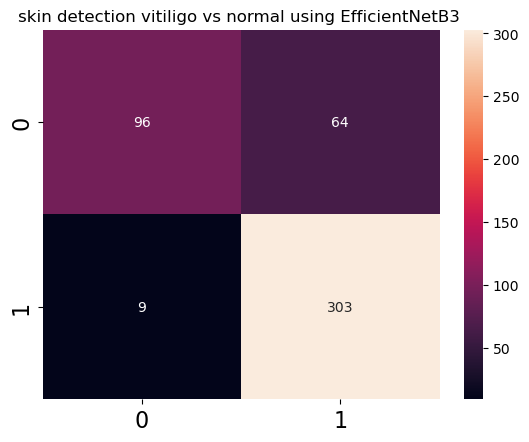

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin detection vitiligo vs normal using EfficientNetB3 ")
plt.xticks(range(2), ['normal', 'Vitiligo'], fontsize=16)
plt.yticks(range(2), ['normal', 'Vitiligo'], fontsize=16)
ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

In [172]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

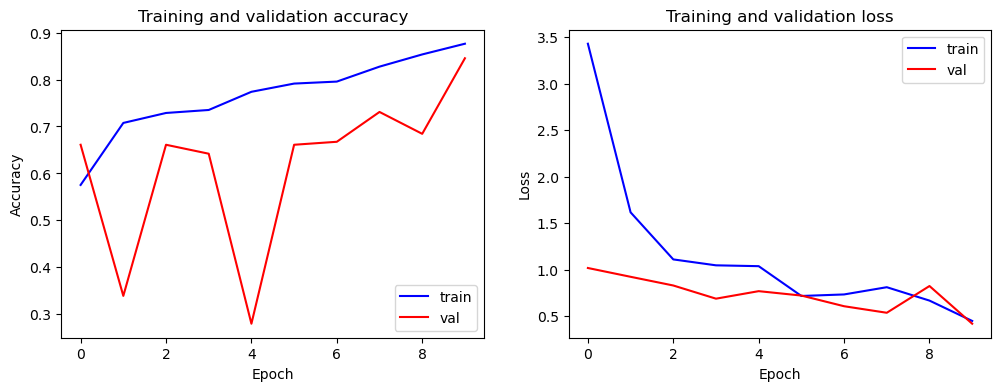

In [173]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [174]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [175]:
confusion_matrix=classification_report(y_test,y_pred2)

In [176]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.91      0.60      0.72       160
           1       0.83      0.97      0.89       312

    accuracy                           0.85       472
   macro avg       0.87      0.79      0.81       472
weighted avg       0.86      0.85      0.84       472

